In [ ]:
conda install -c conda-forge tweepy

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - tweepy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blinker-1.4                |             py_1          13 KB  conda-forge
    oauthlib-3.2.0             |     pyhd8ed1ab_0          90 KB  conda-forge
    requests-oauthlib-1.3.1    |     pyhd8ed1ab_0          22 KB  conda-forge
    tweepy-4.10.1              |     pyhd8ed1ab_0          66 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         190 KB

The following NEW packages will be INSTALLED:

  blinker            conda-forge/noarch::blinker-1.4-py_1
  oauthlib           conda-forge/noarch::oauthlib-3.2.0-pyhd8ed1ab_0
  requests-oauthlib  con

In [ ]:
! pip install selenium

In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [ ]:
reviews = []
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    reviews = reviews+op
    

In [ ]:
review = ''
for ele in reviews:
    review += str(x)
review

'<span class="a-size-base review-text review-text-content" data-hook="review-body">\n<span>Design – A Familiar Face With a Dash of New<br/><br/>Let’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.<br/>But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”<b

In [ ]:
import string
text = review.translate(str.maketrans('', '', string.punctuation))
text

'span classasizebase reviewtext reviewtextcontent datahookreviewbody\nspanDesign – A Familiar Face With a Dash of NewbrbrLet’s start with the design Users of older Oneplus phones will instantly recognize the front side of the phone It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T And honestly it doesn’t bother me at all A notchless design would have been appreciated but that’s reserved for the “Pro” modelbrBut here’s the big twist rounded triplecamera layout Remember Motorola That’s exactly what the Oneplus 7T looks like and the “Triple Lens” carved right above the well triplelens system doesn’t help At its best it helps in distinguishing itself from the rest of the lineup At worst it sticks out literally like a sore thumb That’s not to say that I haven’t grown into it but given the Oneplus 7T Pro’s more predictable design it does get me to ask “Why did Oneplus make it look like this”brThe phone sports a single USBC port which is used for

In [ ]:
tokens = word_tokenize(text)
tokens

['span',
 'classasizebase',
 'reviewtext',
 'reviewtextcontent',
 'datahookreviewbody',
 'spanDesign',
 '–',
 'A',
 'Familiar',
 'Face',
 'With',
 'a',
 'Dash',
 'of',
 'NewbrbrLet',
 '’',
 's',
 'start',
 'with',
 'the',
 'design',
 'Users',
 'of',
 'older',
 'Oneplus',
 'phones',
 'will',
 'instantly',
 'recognize',
 'the',
 'front',
 'side',
 'of',
 'the',
 'phone',
 'It',
 'has',
 'the',
 'same',
 'teardrop',
 'notch',
 'that',
 'the',
 'company',
 'has',
 'provided',
 'in',
 'every',
 'phone',
 'since',
 'the',
 'Oneplus',
 '6T',
 'And',
 'honestly',
 'it',
 'doesn',
 '’',
 't',
 'bother',
 'me',
 'at',
 'all',
 'A',
 'notchless',
 'design',
 'would',
 'have',
 'been',
 'appreciated',
 'but',
 'that',
 '’',
 's',
 'reserved',
 'for',
 'the',
 '“',
 'Pro',
 '”',
 'modelbrBut',
 'here',
 '’',
 's',
 'the',
 'big',
 'twist',
 'rounded',
 'triplecamera',
 'layout',
 'Remember',
 'Motorola',
 'That',
 '’',
 's',
 'exactly',
 'what',
 'the',
 'Oneplus',
 '7T',
 'looks',
 'like',
 'and',

In [ ]:
stop_words = stopwords.words('english')
tokens = [word for word in tokens if not word in stop_words]
tokens

['span',
 'classasizebase',
 'reviewtext',
 'reviewtextcontent',
 'datahookreviewbody',
 'spanDesign',
 '–',
 'A',
 'Familiar',
 'Face',
 'With',
 'Dash',
 'NewbrbrLet',
 '’',
 'start',
 'design',
 'Users',
 'older',
 'Oneplus',
 'phones',
 'instantly',
 'recognize',
 'front',
 'side',
 'phone',
 'It',
 'teardrop',
 'notch',
 'company',
 'provided',
 'every',
 'phone',
 'since',
 'Oneplus',
 '6T',
 'And',
 'honestly',
 '’',
 'bother',
 'A',
 'notchless',
 'design',
 'would',
 'appreciated',
 '’',
 'reserved',
 '“',
 'Pro',
 '”',
 'modelbrBut',
 '’',
 'big',
 'twist',
 'rounded',
 'triplecamera',
 'layout',
 'Remember',
 'Motorola',
 'That',
 '’',
 'exactly',
 'Oneplus',
 '7T',
 'looks',
 'like',
 '“',
 'Triple',
 'Lens',
 '”',
 'carved',
 'right',
 'well',
 'triplelens',
 'system',
 '’',
 'help',
 'At',
 'best',
 'helps',
 'distinguishing',
 'rest',
 'lineup',
 'At',
 'worst',
 'sticks',
 'literally',
 'like',
 'sore',
 'thumb',
 'That',
 '’',
 'say',
 'I',
 '’',
 'grown',
 'given',
 '

In [ ]:
normal_tokens= []
for x in tokens:
    x.lower()
    normal_tokens.append(x)
normal_tokens

['span',
 'classasizebase',
 'reviewtext',
 'reviewtextcontent',
 'datahookreviewbody',
 'spanDesign',
 '–',
 'A',
 'Familiar',
 'Face',
 'With',
 'Dash',
 'NewbrbrLet',
 '’',
 'start',
 'design',
 'Users',
 'older',
 'Oneplus',
 'phones',
 'instantly',
 'recognize',
 'front',
 'side',
 'phone',
 'It',
 'teardrop',
 'notch',
 'company',
 'provided',
 'every',
 'phone',
 'since',
 'Oneplus',
 '6T',
 'And',
 'honestly',
 '’',
 'bother',
 'A',
 'notchless',
 'design',
 'would',
 'appreciated',
 '’',
 'reserved',
 '“',
 'Pro',
 '”',
 'modelbrBut',
 '’',
 'big',
 'twist',
 'rounded',
 'triplecamera',
 'layout',
 'Remember',
 'Motorola',
 'That',
 '’',
 'exactly',
 'Oneplus',
 '7T',
 'looks',
 'like',
 '“',
 'Triple',
 'Lens',
 '”',
 'carved',
 'right',
 'well',
 'triplelens',
 'system',
 '’',
 'help',
 'At',
 'best',
 'helps',
 'distinguishing',
 'rest',
 'lineup',
 'At',
 'worst',
 'sticks',
 'literally',
 'like',
 'sore',
 'thumb',
 'That',
 '’',
 'say',
 'I',
 '’',
 'grown',
 'given',
 '

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in normal_tokens]
stemmed_tokens

['span',
 'classasizebas',
 'reviewtext',
 'reviewtextcont',
 'datahookreviewbodi',
 'spandesign',
 '–',
 'a',
 'familiar',
 'face',
 'with',
 'dash',
 'newbrbrlet',
 '’',
 'start',
 'design',
 'user',
 'older',
 'oneplu',
 'phone',
 'instantli',
 'recogn',
 'front',
 'side',
 'phone',
 'it',
 'teardrop',
 'notch',
 'compani',
 'provid',
 'everi',
 'phone',
 'sinc',
 'oneplu',
 '6t',
 'and',
 'honestli',
 '’',
 'bother',
 'a',
 'notchless',
 'design',
 'would',
 'appreci',
 '’',
 'reserv',
 '“',
 'pro',
 '”',
 'modelbrbut',
 '’',
 'big',
 'twist',
 'round',
 'triplecamera',
 'layout',
 'rememb',
 'motorola',
 'that',
 '’',
 'exactli',
 'oneplu',
 '7t',
 'look',
 'like',
 '“',
 'tripl',
 'len',
 '”',
 'carv',
 'right',
 'well',
 'triplelen',
 'system',
 '’',
 'help',
 'at',
 'best',
 'help',
 'distinguish',
 'rest',
 'lineup',
 'at',
 'worst',
 'stick',
 'liter',
 'like',
 'sore',
 'thumb',
 'that',
 '’',
 'say',
 'i',
 '’',
 'grown',
 'given',
 'oneplu',
 '7t',
 'pro',
 '’',
 'predict'

In [ ]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(tokens))
doc

span classasizebase reviewtext reviewtextcontent datahookreviewbody spanDesign – A Familiar Face With Dash NewbrbrLet ’ start design Users older Oneplus phones instantly recognize front side phone It teardrop notch company provided every phone since Oneplus 6T And honestly ’ bother A notchless design would appreciated ’ reserved “ Pro ” modelbrBut ’ big twist rounded triplecamera layout Remember Motorola That ’ exactly Oneplus 7T looks like “ Triple Lens ” carved right well triplelens system ’ help At best helps distinguishing rest lineup At worst sticks literally like sore thumb That ’ say I ’ grown given Oneplus 7T Pro ’ predictable design get ask “ Why Oneplus make look like ” brThe phone sports single USBC port used charging using Warp CHarge 30T The latest update charging technology allow phone charge 0 70 30 minutes And ’ advertising charger It really work fast While wireless charging would appreciated I ’ happy decently fast wired charging ’ good On flip side headphone jack I kn

In [ ]:
lemmas = [token.lemma_ for token in doc]
lemmas

['span',
 'classasizebase',
 'reviewtext',
 'reviewtextcontent',
 'datahookreviewbody',
 'spandesign',
 '–',
 'a',
 'Familiar',
 'Face',
 'with',
 'Dash',
 'NewbrbrLet',
 "'",
 'start',
 'design',
 'Users',
 'old',
 'Oneplus',
 'phone',
 'instantly',
 'recognize',
 'front',
 'side',
 'phone',
 'it',
 'teardrop',
 'notch',
 'company',
 'provide',
 'every',
 'phone',
 'since',
 'Oneplus',
 '6',
 't',
 'and',
 'honestly',
 "'",
 'bother',
 'a',
 'notchless',
 'design',
 'would',
 'appreciated',
 "'",
 'reserved',
 '"',
 'Pro',
 '"',
 'modelbrBut',
 "'",
 'big',
 'twist',
 'round',
 'triplecamera',
 'layout',
 'remember',
 'Motorola',
 'that',
 "'",
 'exactly',
 'Oneplus',
 '7',
 't',
 'look',
 'like',
 '"',
 'Triple',
 'Lens',
 '"',
 'carve',
 'right',
 'well',
 'triplelen',
 'system',
 "'",
 'help',
 'at',
 'good',
 'help',
 'distinguish',
 'rest',
 'lineup',
 'at',
 'bad',
 'stick',
 'literally',
 'like',
 'sore',
 'thumb',
 'that',
 "'",
 'say',
 'I',
 "'",
 'grow',
 'give',
 'Oneplus'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
vectorizer.vocabulary_

{'span': 383,
 'classasizebase': 88,
 'reviewtext': 344,
 'reviewtextcontent': 345,
 'datahookreviewbody': 116,
 'spandesign': 384,
 'familiar': 160,
 'face': 157,
 'with': 461,
 'dash': 115,
 'newbrbrlet': 269,
 'start': 389,
 'design': 121,
 'users': 441,
 'old': 282,
 'oneplus': 286,
 'phone': 300,
 'instantly': 224,
 'recognize': 334,
 'front': 177,
 'side': 361,
 'it': 226,
 'teardrop': 405,
 'notch': 274,
 'company': 98,
 'provide': 321,
 'every': 146,
 'since': 365,
 'and': 37,
 'honestly': 211,
 'bother': 66,
 'notchless': 275,
 'would': 463,
 'appreciated': 45,
 'reserved': 340,
 'pro': 318,
 'modelbrbut': 261,
 'big': 61,
 'twist': 433,
 'round': 348,
 'triplecamera': 429,
 'layout': 234,
 'remember': 339,
 'motorola': 263,
 'that': 412,
 'exactly': 148,
 'look': 243,
 'like': 238,
 'triple': 428,
 'lens': 237,
 'carve': 80,
 'right': 346,
 'well': 452,
 'triplelen': 430,
 'system': 400,
 'help': 203,
 'at': 50,
 'good': 193,
 'distinguish': 126,
 'rest': 342,
 'lineup': 239,

In [ ]:
feature_names = vectorizer.get_feature_names()
from sklearn.feature_extraction.text import TfidfVectorizer
dense = X.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,1080,1080p,12mp,13,1440p,16mp,2400,25,256,...,whop,why,wideangle,wire,wireless,with,work,would,year,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('negative-words.txt','r') as positive:
    negetive_words = positive.read().split('\n')

with open('positive-words.txt','r') as negetive:
    positive_words = negetive.read().split('\n')

txt_neg_in_nw = ' '.join([word for word in df if word in negetive_words])
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

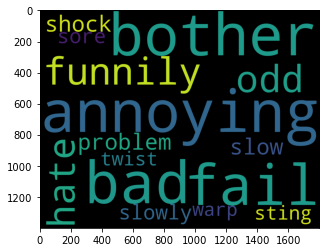

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)
plt.imshow(wordcloud_neg)

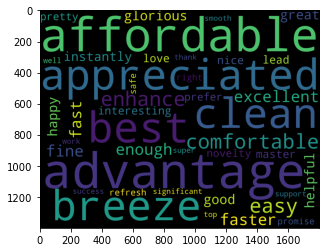

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)
plt.imshow(wordcloud_pos)